# 9. Statistics & supervised machine learning

Explanation vs. prediction

TO DECIDE
- ...

### Text book

- Computer Age Statistical Inference

### Notes

- Check https://doi.org/10.1145/1150402.1150412


## 9.1. Explanation (statistical modeling)

- model fit r^2
- variable transformation
- hypothesis and significance testing
- generalized linear model: linear and logistic regression

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

#### Data

In [1]:
import pandas as pd

In [2]:
vdem_fh = pd.read_csv('./vdem_fh_combined.csv')
vdem = pd.read_csv('./vdem_only.csv')

In [3]:
vdem_fh.head()

,Country,Total Score,Status,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol
0,Angola,64,Partly Free,Angola,2019,0.386,0.230,0.105,0.260,0.148,1.0,2.441,2.969,3.924,2.883,1.995,4
1,Argentina,72,Free,Argentina,2019,0.812,0.631,0.527,0.635,0.592,2.0,3.340,3.847,3.930,3.321,2.605,2
2,Armenia,76,Free,Armenia,2019,0.805,0.641,0.532,0.706,0.656,1.0,2.926,3.714,3.915,3.293,2.493,1
3,Australia,77,Free,Australia,2019,0.838,0.789,0.602,0.737,0.706,3.0,2.878,3.829,3.876,3.300,2.684,5
4,Azerbaijan,39,Not Free,Azerbaijan,2019,0.206,0.070,0.072,0.047,0.118,1.0,0.384,1.231,2.672,1.558,0.777,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme(style='darkgrid')

In [6]:
indicators_regression = ['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']

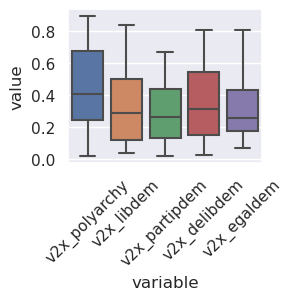

In [7]:
plt.figure(figsize=[2.5, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem_fh[indicators_regression].melt()
)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

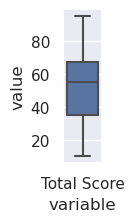

In [8]:
plt.figure(figsize=[.5, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem_fh[['Total Score']].melt()
)

### 9.1.1. Regression

#### Correlations

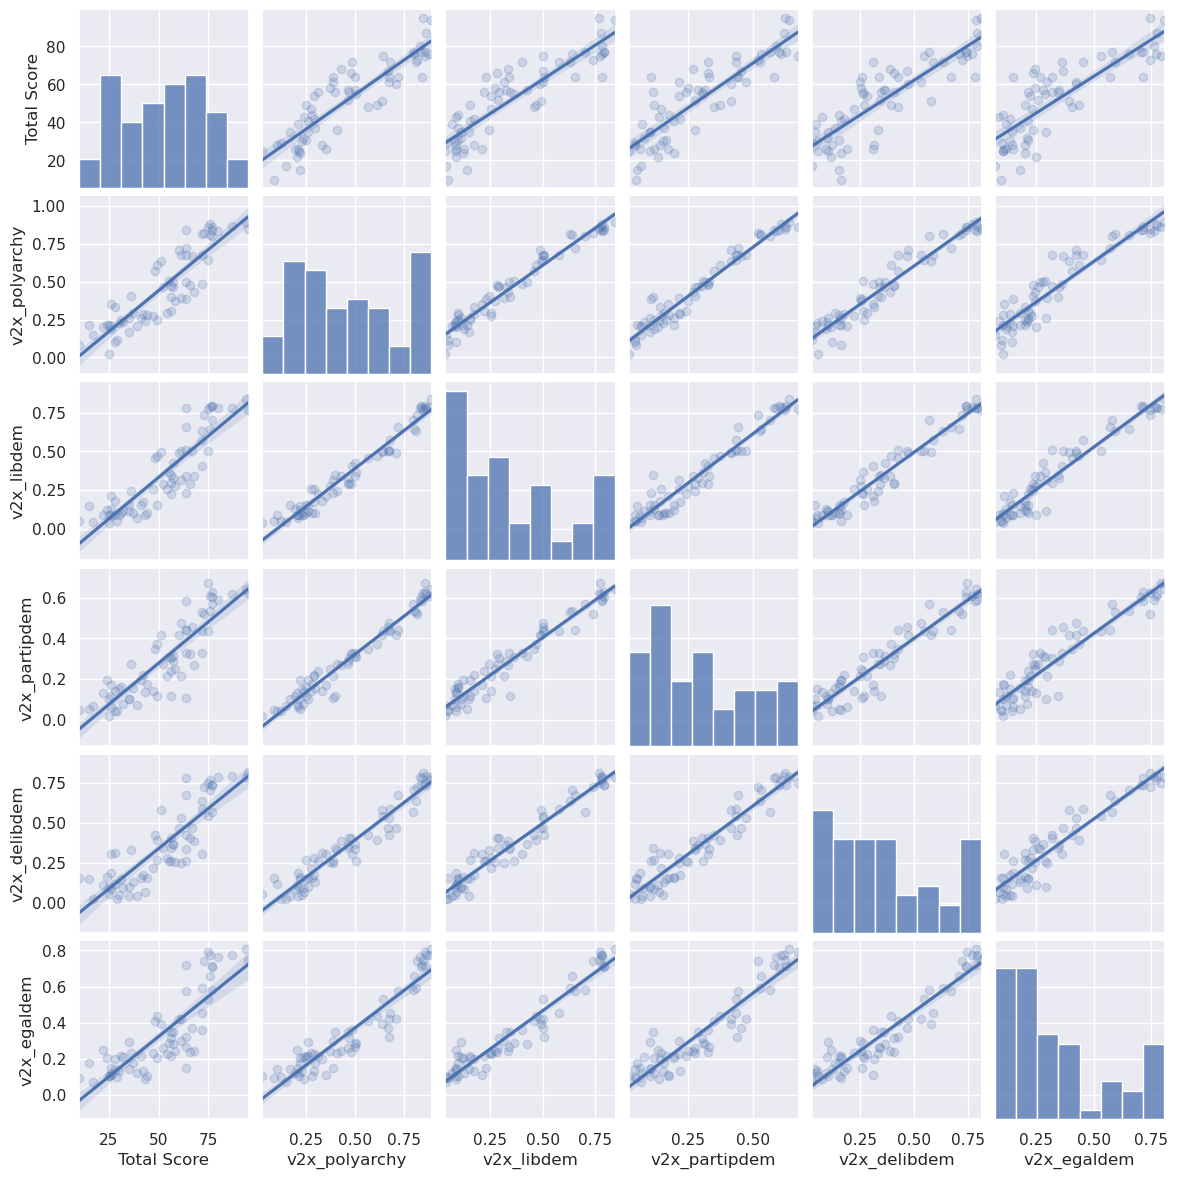

In [9]:
fig = sns.pairplot(
    data = vdem_fh[['Total Score', 'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']], 
    #hue = 'v2x_regime', 
    height = 2, 
    kind = 'reg', 
    diag_kind = 'hist', 
    plot_kws = {'scatter_kws': {'alpha': .2}}
)
#fig.savefig('.............vdem_fh_pairplot.png')
plt.show()

#### Ordinary-Least-Squares regression

In [10]:
standardize = False

In [11]:
X_vdem_fh = vdem_fh[indicators_regression].to_numpy()
y_vdem_fh = vdem_fh[['Total Score']].to_numpy()

if standardize:
    from sklearn.preprocessing import StandardScaler
    
    X_vdem_fh = StandardScaler().fit_transform(X_vdem_fh)
    y_vdem_fh = StandardScaler().fit_transform(y_vdem_fh)
    
    fit_intercept = False
else:
    fit_intercept = True

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
ols_vdem_fh = LinearRegression(fit_intercept=fit_intercept)

In [14]:
ols_vdem_fh_fit = ols_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

Goodness of fit (R^2)

In [15]:
ols_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7902823278954166

Intercept

In [16]:
ols_vdem_fh_fit.intercept_

array([23.34152179])

Coefficients

In [17]:
ols_vdem_fh_fit.coef_[0]

array([ 32.54042368,  55.61438425,  15.09680851,  -6.88939045,
       -23.61813015])

Significance? Not with sklearn!

#### Statsmodels

In [18]:
import statsmodels.api as sm

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [19]:
X_vdem_fh_ = sm.add_constant(X_vdem_fh)

In [20]:
if standardize:
    ols_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
else:
    ols_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_) # equivalent to fit_intercept=True (https://stackoverflow.com/questions/70179307/why-is-sklearn-r-squared-different-from-that-of-statsmodels-when-fit-intercept-f/70180217#70180217)
ols_vdem_fh_sm_fit = ols_vdem_fh_sm.fit()

In [21]:
ols_vdem_fh_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     44.47
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.88e-19
Time:                        21:06:24   Log-Likelihood:                -237.78
No. Observations:                  65   AIC:                             487.6
Df Residuals:                      59   BIC:                             500.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3415      3.857      6.051      0.000      15.623      31.060
x1            32.5404     30.961      1.051      0.298     -29.412      94.493
x2            55.6144     34.372      1.618      0.111     -13.165     124.393
x3            15.0968     31.837      0.474      0.637     -48.610      78.803
x4            -6.8894     23.333     -0.295      0.769     -53.578      39.799
x5           -23.6181     21.703     -1.088      0.281     -67.045      19.809
==============================================================================
Omnibus:                        2.813   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.605
Skew:                           0.016   Prob(JB):                        0.448
Kurtosis:                       2.231   Cond. No.                         46.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# goodness of fit (R^2)
ols_vdem_fh_sm_fit.rsquared
#ols_vdem_fh_sm_fit.rsquared_adj

0.7902823278954166

In [23]:
# intercept and coefficients
ols_vdem_fh_sm_fit.params

array([ 23.34152179,  32.54042368,  55.61438425,  15.09680851,
        -6.88939045, -23.61813015])

In [24]:
# significance scores
ols_vdem_fh_sm_fit.pvalues

array([1.06415397e-07, 2.97535245e-01, 1.10997548e-01, 6.37117791e-01,
       7.68824862e-01, 2.80906105e-01])

In [25]:
import numpy as np

In [26]:
def format_coef(df, coef, pvalues=None):
    df[coef] = df[coef].apply(lambda x: '{0:.2f}'.format(x))
    if pvalues is not None:
        def stars(cell):
            if cell <= .001:
                cell = '***'
            elif cell <= .01:
                cell = '**'
            elif cell <= .1:
                cell = '*'
            else:
                cell = ''
            return cell
        df['pvalues'] = pvalues
        df['stars'] = df['pvalues'].apply(stars)
        df[coef] = df[coef] + df['stars']
        del df['pvalues']
        del df['stars']
    return df

In [27]:
if standardize:
    vdem_fh_regression = pd.DataFrame(
        data = ols_vdem_fh_sm_fit.params, 
        index = indicators_regression, 
        columns = ['OLS']
    )
else:
    vdem_fh_regression = pd.DataFrame(
        data = ols_vdem_fh_sm_fit.params, 
        index = np.concatenate([['intercept'], indicators_regression]), 
        columns = ['OLS']
    )
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='OLS', pvalues=ols_vdem_fh_sm_fit.pvalues)
vdem_fh_regression

,OLS
intercept,23.34***
v2x_polyarchy,32.54
v2x_libdem,55.61
v2x_partipdem,15.10
v2x_delibdem,-6.89
v2x_egaldem,-23.62


#### Ridge regression to deal with collinearity

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridge_vdem_fh = Ridge(alpha=1., fit_intercept=fit_intercept, random_state=42)

In [30]:
ridge_vdem_fh_fit = ridge_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

In [31]:
# goodness of fit
ridge_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7736828263938498

In [32]:
# intercept
ridge_vdem_fh_fit.intercept_

array([24.57530599])

In [33]:
# coefficients
ridge_vdem_fh_fit.coef_[0]

array([20.3224907 , 18.53938774, 14.21497605, 12.84013467,  7.71160108])

Significance scores are meaningless with regularization (https://stats.stackexchange.com/questions/224796/why-are-confidence-intervals-and-p-values-not-reported-as-default-for-penalized)

In [34]:
if standardize:
    vdem_fh_regression['Ridge'] = ridge_vdem_fh_fit.coef_[0] # ridge_vdem_fh_sm_fit.params
else:
    vdem_fh_regression['Ridge'] = np.concatenate([ridge_vdem_fh_fit.intercept_, ridge_vdem_fh_fit.coef_[0]])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='Ridge', pvalues=None)
vdem_fh_regression

,OLS,Ridge
intercept,23.34***,24.58
v2x_polyarchy,32.54,20.32
v2x_libdem,55.61,18.54
v2x_partipdem,15.10,14.21
v2x_delibdem,-6.89,12.84
v2x_egaldem,-23.62,7.71


Ridge regression using statsmodels, just for completeness (requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression):

In [35]:
n = vdem_fh.shape[0]
if standardize:
    ridge_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
    penalty = np.ones(len(indicators_regression)) / n

else:
    ridge_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_)
    penalty = np.concatenate([[0.], np.ones(len(indicators_regression))]) / n

ridge_vdem_fh_sm_fit = ridge_vdem_fh_sm.fit_regularized(alpha=penalty, L1_wt=0.)
ridge_vdem_fh_sm_fit.params

array([24.57530599, 20.3224907 , 18.53938774, 14.21497605, 12.84013467,
        7.71160108])

#### Lasso regression to automatically select variables

In [36]:
alpha_lasso = 1. # if alpha < 1. then Lasso becomes Elastic Net (https://stats.stackexchange.com/questions/319861/how-to-interpret-lasso-shrinking-all-coefficients-to-0)

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_vdem_fh = Lasso(alpha=alpha_lasso, fit_intercept=fit_intercept, random_state=42)

In [39]:
lasso_vdem_fh_fit = lasso_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

In [40]:
# goodness of fit
lasso_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7461837725999856

In [41]:
# intercept
lasso_vdem_fh_fit.intercept_

array([27.80141612])

In [42]:
# coefficients
lasso_vdem_fh_fit.coef_

array([37.53608076, 19.18122251,  0.        ,  0.        ,  0.        ])

In [43]:
if standardize:
    vdem_fh_regression['Lasso'] = lasso_vdem_fh_fit.coef_
else:
    vdem_fh_regression['Lasso'] = np.concatenate([lasso_vdem_fh_fit.intercept_, lasso_vdem_fh_fit.coef_])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='Lasso', pvalues=None)
vdem_fh_regression

,OLS,Ridge,Lasso
intercept,23.34***,24.58,27.80
v2x_polyarchy,32.54,20.32,37.54
v2x_libdem,55.61,18.54,19.18
v2x_partipdem,15.10,14.21,0.00
v2x_delibdem,-6.89,12.84,0.00
v2x_egaldem,-23.62,7.71,0.00


Lasso regression using statsmodels, just for completeness (requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression):

In [44]:
if standardize:
    lasso_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
    penalty = np.ones(len(indicators_regression))*alpha_lasso
else:
    lasso_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_)
    penalty = np.concatenate([[0.], np.ones(len(indicators_regression))*alpha_lasso])

lasso_vdem_fh_sm_fit = lasso_vdem_fh_sm.fit_regularized(alpha=penalty, L1_wt=1.)
lasso_vdem_fh_sm_fit.params

array([27.26460384, 42.08282177, 14.72574299,  0.        ,  0.        ,
        0.        ])

#### Ordinary-Least-Squares regression with two variables

In [45]:
indicators_regression_select = ['v2x_polyarchy', 'v2x_libdem']

In [46]:
X_vdem_fh_select = vdem_fh[indicators_regression_select].to_numpy()

if standardize:
    X_vdem_fh_select = StandardScaler().fit_transform(X_vdem_fh_select)

In [47]:
X_vdem_fh_select_ = sm.add_constant(X_vdem_fh_select)

In [48]:
if standardize:
    ols_vdem_fh_select_sm = sm.OLS(y_vdem_fh, X_vdem_fh_select)
else:
    ols_vdem_fh_select_sm = sm.OLS(y_vdem_fh, X_vdem_fh_select_)
ols_vdem_fh_select_sm_fit = ols_vdem_fh_select_sm.fit()

In [49]:
ols_vdem_fh_select_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.12e-21
Time:                        21:06:24   Log-Likelihood:                -238.64
No. Observations:                  65   AIC:                             483.3
Df Residuals:                      62   BIC:                             489.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5723      3.447      6.258      0.000      14.682      28.463
x1            42.4794     24.006      1.770      0.082      -5.507      90.466
x2            30.3993     24.190      1.257      0.214     -17.957      78.755
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.432
Skew:                           0.040   Prob(JB):                        0.489
Kurtosis:                       2.277   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vdem_fh_regression['OLS (select)'] = np.concatenate([ols_vdem_fh_select_sm_fit.params, np.empty(len(indicators_regression)-len(indicators_regression_select))*np.nan])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='OLS (select)', pvalues=np.concatenate([ols_vdem_fh_select_sm_fit.pvalues, np.empty(len(indicators_regression)-len(indicators_regression_select))*np.nan]))
vdem_fh_regression

,OLS,Ridge,Lasso,OLS (select)
intercept,23.34***,24.58,27.80,21.57***
v2x_polyarchy,32.54,20.32,37.54,42.48*
v2x_libdem,55.61,18.54,19.18,30.40
v2x_partipdem,15.10,14.21,0.00,nan
v2x_delibdem,-6.89,12.84,0.00,nan
v2x_egaldem,-23.62,7.71,0.00,nan


### 9.1.2. Classification

In [51]:
indicators_logit = ['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp', 'v2smonper_osp', 'v2smarrest_osp']

In [52]:
X_vdem_logit = vdem[indicators_logit].to_numpy()
y_vdem_logit = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logit_vdem = LogisticRegression(penalty='none', C=1., fit_intercept=False)

In [55]:
logit_vdem_fit = logit_vdem.fit(X_vdem_logit, y_vdem_logit)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [56]:
# goodness of fit
logit_vdem_fit.score(X_vdem_logit, y_vdem_logit)

0.8044692737430168

In [57]:
# intercept
logit_vdem_fit.intercept_

array([0.])

In [58]:
# coefficients
logit_vdem_fit.coef_[0]

array([ 0.79370968,  0.5426701 , -2.45795325, -0.01638149,  2.63622393])

In [59]:
X_vdem_logit_ = sm.add_constant(X_vdem_logit)

In [60]:
logit_vdem_sm = sm.Logit(y_vdem_logit, X_vdem_logit_)

In [61]:
logit_vdem_sm_fit = logit_vdem_sm.fit()

Optimization terminated successfully.
         Current function value: 0.307529
         Iterations 8


In [62]:
logit_vdem_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.5561
Time:                        21:06:24   Log-Likelihood:                -55.048
converged:                       True   LL-Null:                       -124.00
Covariance Type:            nonrobust   LLR p-value:                 4.972e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4421      2.330     -4.481      0.000     -15.009      -5.875
x1             0.9712      0.366      2.656      0.008       0.255       1.688
x2            -0.0771      0.641     -0.120      0.904      -1.333       1.179
x3             1.2056      0.868      1.389      0.165      -0.496       2.907
x4             0.2513      0.549      0.458      0.647      -0.825       1.327
x5             1.8268      0.545      3.350      0.001       0.758       2.896
==============================================================================
"""

In [63]:
# goodness of fit
logit_vdem_sm_fit.prsquared

0.5560797620202649

In [64]:
# intercept and coefficients
logit_vdem_sm_fit.params

array([-10.44206953,   0.97115917,  -0.07713647,   1.20558503,
         0.25125261,   1.82681524])

In [65]:
# significance scores
logit_vdem_sm_fit.pvalues

array([7.42006943e-06, 7.89728126e-03, 9.04197013e-01, 1.64840553e-01,
       6.47146164e-01, 8.08094675e-04])

In [66]:
vdem_classification = pd.DataFrame(
    data = logit_vdem_sm_fit.params, 
    index = np.concatenate([['intercept'], indicators_logit]), 
    columns = ['Logit']
)
vdem_classification = format_coef(df=vdem_classification, coef='Logit', pvalues=logit_vdem_sm_fit.pvalues)
vdem_classification

,Logit
intercept,-10.44***
v2smgovdom_osp,0.97**
v2smgovfilprc_osp,-0.08
v2smgovsmcenprc_osp,1.21
v2smonper_osp,0.25
v2smarrest_osp,1.83***


## 9.2. Prediction (supervised machine learning)

- Out-of-sample testing
- Cross validation
- Data leakage
- Feature selection
- Over- and underfitting

- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


<div class='alert alert-block alert-success'>
<b>TASK</b>

Copy the codes from https://github.com/UWNETLAB/dcss_supplementary/blob/main/chapter_notebooks/chapter_20.ipynb here, starting with "The Train-Test Split", and make them run. Don't read the data in again. Use `vdem` and `vdem_fh` instead.
</div>

#### The Train-Test Split

In [67]:
from sklearn.model_selection import train_test_split

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=23)

### Supervised Learning with Linear Regression
#### Ordinary Least Squares (OLS) Regression

In [68]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [69]:
ols.fit(X_train, y_train)

LinearRegression()

In [70]:
print("Intercept", list(X_train.columns))
print(ols.intercept_, ols.coef_)

Intercept ['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']
[20.63811519] [[ 50.39585893  39.56204743  -8.08759862  13.15629676 -23.17231143]]


In [71]:
ols.score(X_train, y_train)

0.8001472299432686

### CROSS-VALIDATION
#### Putting The Two Together: OLS and CV

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(ols, X_train, y_train, cv=5)

array([0.83058131, 0.78927647, 0.49840463, 0.79752537, 0.43638926])

In [73]:
from sklearn.model_selection import ShuffleSplit

shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

olscv_score = cross_val_score(ols, X_train, y_train, cv=shuffsplit)
olscv_score

array([0.69717758, 0.75979355, 0.85291181, 0.75438354, 0.82520158])

#### Cheating on the Test

In [74]:
olscv_score.mean()

0.7778936127600506

In [75]:
ols.score(X_test, y_test)

0.7138660952137661

### Regularization via Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2)
shuffsplit = ShuffleSplit(n_splits=15, test_size=0.2, random_state=2)

ridgereg = Ridge(1)
ridgecv_score = cross_val_score(ridgereg, X_train, y_train, cv=shuffsplit)
print(ridgecv_score)
print(f"Mean: {ridgecv_score.mean()}")

[0.76925883 0.6824065  0.55949992 0.8241338  0.68662485 0.70895771
 0.75976052 0.81467692 0.45224363 0.70896388 0.8031883  0.79628239
 0.80544664 0.59523827 0.75607114]
Mean: 0.714850220864512


### Regularization via Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(1)
lassocv_score = cross_val_score(lassoreg, X_train, y_train, cv=shuffsplit)
print(lassocv_score)
print(f"Mean: {lassocv_score.mean()}")

[0.66584977 0.57869829 0.56643005 0.80293505 0.63309778 0.67545323
 0.68783192 0.76130175 0.40440872 0.6672346  0.70078081 0.75350907
 0.78697977 0.56112952 0.7518551 ]
Mean: 0.6664996955827663


In [78]:
alphas = np.linspace(0.01, 2, 50)

ridge_r2s = []
lasso_r2s = []

olscv_score = cross_val_score(LinearRegression(), X_train, y_train, cv=shuffsplit)

for alpha in alphas:
    new_ridge = Ridge(alpha)
    ridge_r2s.append(cross_val_score(new_ridge, X_train, y_train, cv=shuffsplit).mean())
    
    new_lasso = Lasso(alpha)
    new_lasso.fit(X_train, y_train)
    lasso_r2s.append(cross_val_score(new_lasso, X_train, y_train, cv=shuffsplit).mean())
    
r2s = pd.DataFrame(
    zip(alphas, ridge_r2s, lasso_r2s), 
    columns = ["alpha", "Ridge Regression", "Lasso Regression"])

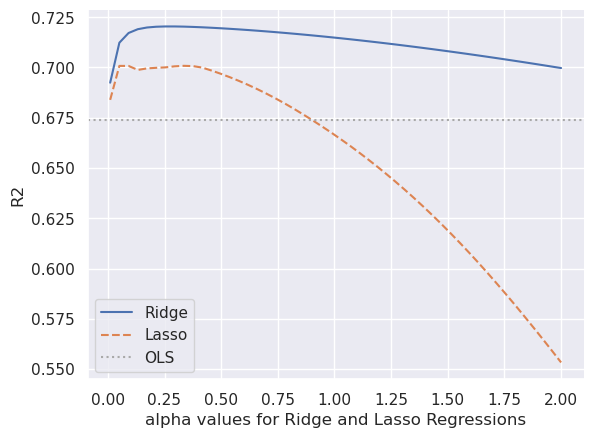

In [79]:
fig, ax = plt.subplots()
sns.lineplot(x="alpha", y="Ridge Regression", data = r2s, label="Ridge", linestyle='solid')
sns.lineplot(x="alpha", y="Lasso Regression", data = r2s, label = "Lasso", linestyle='dashed')
ax.axhline(olscv_score.mean(), label="OLS", linestyle='dotted', color="darkgray")
ax.set(xlabel='alpha values for Ridge and Lasso Regressions', ylabel='R2')
sns.despine()
ax.legend()
plt.show()

In [80]:
best_alpha = alphas[ridge_r2s.index(max(ridge_r2s))]
best_alpha

0.2942857142857143

In [81]:
best_ridgereg = Ridge(best_alpha)
best_ridgereg.fit(X_train, y_train)

pd.DataFrame(
    [
        *best_ridgereg.intercept_, 
        *np.ravel(best_ridgereg.coef_)], 
    index=['Intercept', *X_test.columns]
)

,0
Intercept,22.769359
v2x_polyarchy,21.976134
v2x_libdem,20.601121
v2x_partipdem,22.536885
v2x_delibdem,5.303777
v2x_egaldem,7.585864


In [82]:
best_ridgereg.score(X_test, y_test)

0.7472740093285359

#### Model Interpretation

In [83]:
predictions = np.round(best_ridgereg.predict(X_test))

In [84]:
np.ravel(predictions)

array([41., 40., 37., 34., 52., 82., 49., 33., 63., 49., 50., 73., 77.,
       51., 29., 34., 33.])

In [85]:
preds = pd.DataFrame({"Total Score": y_test['Total Score'], "Predicted Score": np.ravel(predictions), "Country":  vdem_fh.loc[y_test.index]['Country']})
preds

,Total Score,Predicted Score,Country
0,64,41.0,Angola
28,47,40.0,Jordan
62,24,37.0,Vietnam
29,32,34.0,Kazakhstan
23,55,52.0,India
10,87,82.0,Canada
30,68,49.0,Kenya
51,35,33.0,Thailand
36,60,63.0,Mexico
32,52,49.0,Lebanon


### CLASSIFICATION WITH LOGISTIC REGRESSION

In [86]:
y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

X = vdem[[
                 'v2smgovdom_osp', 
                 "v2smgovfilprc_osp", 
                 "v2smgovsmcenprc_osp", 
                 "v2smonper_osp", 
                 "v2smarrest_osp", 
]]

In [87]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

log_reg = cross_val_score(
    LogisticRegression(), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg)
print(f"Mean: {log_reg.mean()}")

[0.96296296 0.85185185 0.88888889 0.85185185 0.7037037 ]
Mean: 0.8518518518518519


In [88]:
log_reg_regularized = cross_val_score(
    LogisticRegression(C=0.5), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg_regularized)
print(f"Mean: {log_reg_regularized.mean()}")

[0.96296296 0.85185185 0.88888889 0.85185185 0.7037037 ]
Mean: 0.8518518518518519


### CONCLUSION
#### Key Points

BOXES: REFER TO SUPPORT VECTOR MACHINES AND NAIVE BAYES CLASSIFICATION

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

## 9.3. Decision trees and random forests

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

<div class='alert alert-block alert-success'>
<b>TASK</b>

Copy the codes from https://github.com/UWNETLAB/dcss_supplementary/blob/main/chapter_notebooks/chapter_21.ipynb here. Note that the data called `forml` there is our data `vdem_fh`.
</div>

#### The Train-Test Split and Cross-Validation

In [89]:
from sklearn.model_selection import train_test_split

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

### RULES-BASED LEARNING WITH TREES
#### Decision Trees

<div class='alert alert-block alert-danger'>
<b>NOTE:</b>
    
I used `vdem` instead of `dem_indices` in the follwoing cells. Let me know if it is incorrect, so that I will modify it. 
</div>

In [90]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.preprocessing import LabelEncoder

# dem_indices = pd.read_csv("../data/vdem_internet_freedom_combined/dem_indices.csv")

X = vdem[[
                 'v2smgovdom_osp', # Government dissemination of false information domestic
                 "v2smgovfilprc_osp", # Government internet filtering in practice
                 "v2smgovsmcenprc_osp", # Government social media censorship in practice
                 "v2smonper_osp", # Diversity of online media perspectives (0 = gov't only, 4 = any perspective)
                 "v2smarrest_osp", # Arrests for political content disseminated online
]]

interpretable_names = [
    'Domestic Misinformation',
    'Internet Filtering',
    'Social Media Censorship',
    'Online Media Diversity',
    'Arrests for Political Content'
]

regime_types = [
    'Autocracy',
    'Democracy',
]


le = LabelEncoder()
labels = le.fit_transform(regime_types)

y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

shuffsplit = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

dtclass = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dtclass, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

[0.68292683 0.73170732 0.7804878  0.75609756 0.82926829]
Mean: 0.7560975609756098


In [92]:
# vdem.v2x_regime

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
from sklearn import preprocessing

dt_fitted = dtclass.fit(X_train, y_train)

export_graphviz(
    dtclass,
    out_file='../graphical_models/classified_1.gv', 
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

#### What About Overfitting?

In [ ]:
dtclass_pruned = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_scores = cross_val_score(dtclass_pruned, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
dtclass_pruned.fit(X_train, y_train)

export_graphviz(
    dtclass_pruned,
    out_file='../graphical_models/pruned.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

In [ ]:
dtclass_pruned.score(X_test, y_test)

### ENSEMBLE LEARNING

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_of_trees = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=100,
                                bootstrap=True,
                                random_state=0)

bt_scores = cross_val_score(bag_of_trees, X_train, y_train, cv=shuffsplit)
print(bt_scores)
print(f"Mean: {bt_scores.mean()}")

#### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100,
                                max_features=2,
                                random_state=0)

rforest_scores = cross_val_score(rforest, X_train, y_train, cv=shuffsplit)
print(rforest_scores)
print(f"Mean: {rforest_scores.mean()}")

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
rforest.fit(X_train, y_train)

export_graphviz(
    rforest.estimators_[6],
    out_file='../graphical_models/rf_classified.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

### Gradient Boosted Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(n_estimators=100,
                                random_state=0)

gboost_scores = cross_val_score(gboost, X_train, y_train, cv=shuffsplit)
print(gboost_scores)
print(f"Mean: {gboost_scores.mean()}")

In [ ]:
model_list = [dtclass,
dtclass_pruned,
bag_of_trees.fit(X_train, y_train),
rforest,
gboost.fit(X_train, y_train)]

for model in model_list:
    print(model.score(X_test, y_test))

### Evaluation Beyond Accuracy
### Balancing False Positives and False Negatives in Classification Models
### Improving Binary Classification with Curves
#### Precision-Recall Curves
#### Beyond Binary Classifiers
### CONCLUSION
#### Key Points

## 9.4. Towards deep learning

Check https://doi.org/10.1073/pnas.1218772110

- Convey an understanding of neural networks and deep learning
- Start by extendin features by hashtag/named entity/mention representations
- Use neural network off the sklearn shelf

<div class='alert alert-block alert-success'>
<b>TASK</b>

Implement a neural network regression (https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression) for the same data used above. Take notes on potential overfitting.
</div>

### Multi-layer Perceptron (MLP)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2023)

In [11]:
regressor = MLPRegressor(random_state=1,hidden_layer_sizes=(2,) , max_iter=500).fit(X_train, y_train)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
cv_scores = cross_val_score(regressor, X_train, y_train, cv = 5)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer:

In [15]:
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))

Cross-validation scores: [-6.98666986 -6.99124744 -5.98488825 -7.60877268 -5.85182062]
Average cross-validation score: -6.68
Standard deviation of cross-validation scores: 0.67


## 9.5. Model selection

- By interpretability
- By predictive accuracy

#### Notes to be removed before publication

- add cvxopt=1.2.6 to environment.yml -- NOT NECSSARY ANYMORE CAUSE WE DON'T USE method=sqrt_lasso IN statsmodels RIDGE REGRESSION ANYMORE
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
- ...